In [1]:
import os
from cvt import histogram

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image   


notebook_dir = os.path.abspath("")

images_dir = os.path.join(os.path.abspath(os.path.join(notebook_dir,"..", "data", "test_images")))

print(images_dir)

list_images = os.listdir(images_dir)
i = 0
for image_name in list_images:
    print(f"image {i}: {image_name}\n")
    i += 1


/home/yasin/Projects/computer-vision-toolkit/data/test_images
image 0: tree.bmp

image 1: palm.bmp

image 2: pale_blue_dot.tif

image 3: pepper.bmp

image 4: BoatsColor.bmp

image 5: boats.bmp

image 6: fbtaraftar.bmp

image 7: airplane.bmp

image 8: goldhill.bmp

image 9: baboon.bmp

image 10: landscape.bmp

image 11: barbara.bmp

image 12: lenna.bmp

image 13: low_contrast_lenna.bmp



In [2]:
import numpy as np
import matplotlib.pyplot as plt

def apply_filter(image, kernel):
    # Initialize output array
    output = np.zeros_like(image, dtype=np.float32)
    
    # Get kernel dimensions once
    k_height, k_width = kernel.shape
    pad_height = k_height // 2 
    pad_width = k_width // 2
    
    # If RGB image, process each channel separately
    if image.ndim == 3:
        # Pad the entire RGB image at once
        padded_img = np.pad(image,
                         ((pad_height, pad_height),
                          (pad_width, pad_width),
                          (0, 0)),  # Don't pad channels
                         mode='reflect')
        
        img_height, img_width, _ = image.shape
        
        # Process each pixel
        for i in range(img_height):
            for j in range(img_width):
                for c in range(3):  # For each channel
                    region = padded_img[i:i+k_height, j:j+k_width, c]
                    output[i,j,c] = np.sum(region * kernel)
                    
    # For grayscale images
    else:
        padded_img = np.pad(image,
                         ((pad_height, pad_height),
                          (pad_width, pad_width)),
                         mode='reflect')
        
        img_height, img_width = image.shape
        
        for i in range(img_height):
            for j in range(img_width):
                region = padded_img[i:i+k_height, j:j+k_width]
                output[i,j] = np.sum(region * kernel)
    
    return np.clip(output, 0, 255).astype(np.uint8)

def get_laplacian_kernel(alpha):
    base_kernel = np.array([
        [   0,      -alpha,     0],
        [-alpha, 1+ 4*alpha, -alpha],
        [   0,      -alpha,     0]  # Fixed: changed alpha to -alpha for correct Laplacian
    ])
    return base_kernel

def gaussian_kernel(size, sigma):
    # Ensure size is odd
    size = size if size % 2 == 1 else size + 1
    
    # Create coordinate matrices
    ax = np.linspace(-(size-1)/2, (size-1)/2, size)
    xx, yy = np.meshgrid(ax, ax)
    
    # Calculate Gaussian values
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sigma))
    
    # Normalize
    return kernel / np.sum(kernel)

def plot_images(np_images, titles=None):
    # Handle single image case
    if isinstance(np_images, np.ndarray) and len(np_images.shape) in [2, 3]:
        np_images = [np_images]
    
    # Convert titles to list if needed
    if titles is not None and not isinstance(titles, (list, tuple)):
        titles = [titles]
    
    n_images = len(np_images)
    fig, axes = plt.subplots(1, n_images, figsize=(30, 30))
    
    # Handle single image case for axes
    if n_images == 1:
        axes = [axes]
    
    for i, (img, ax) in enumerate(zip(np_images, axes)):
        if len(img.shape) == 3 and img.shape[2] == 1:
            img = img[:,:,0]
        ax.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
        ax.axis('off')
        if titles is not None and i < len(titles):
            ax.set_title(titles[i])
    
    plt.show()

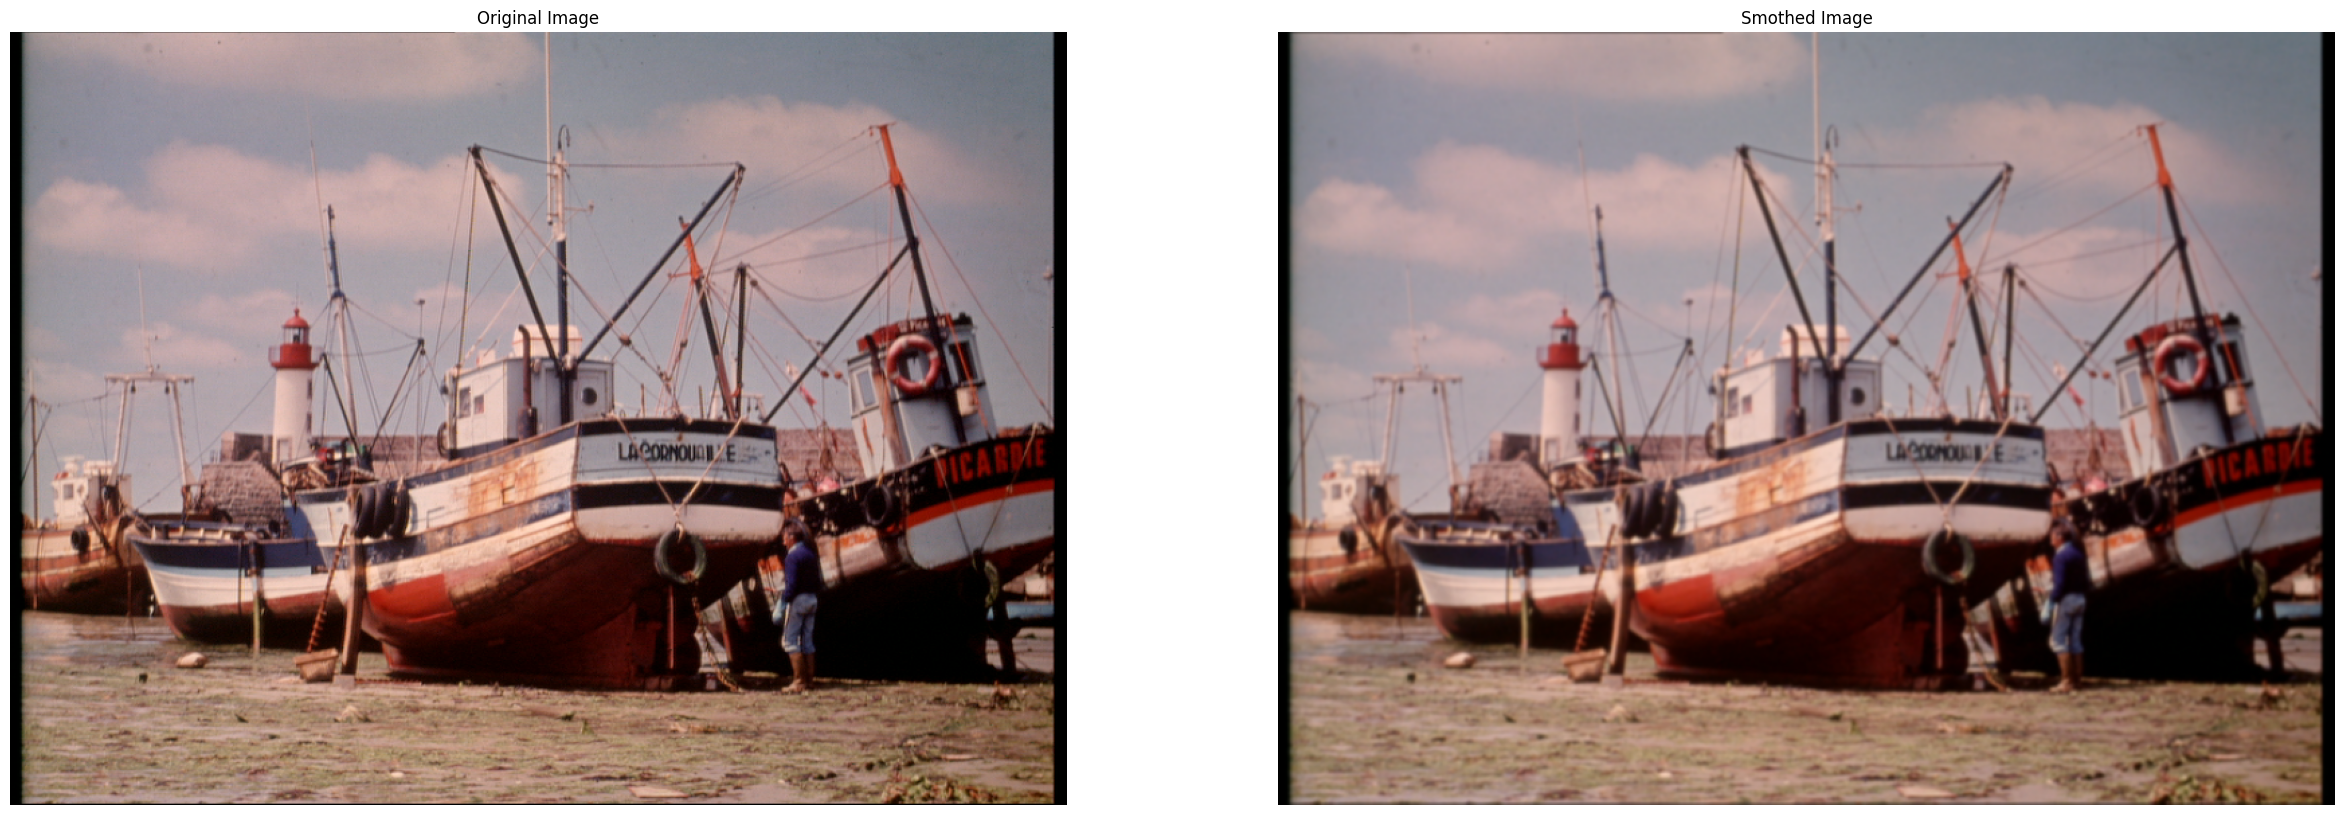

In [9]:
image = Image.open(os.path.join(images_dir, list_images[4]))

#image = image.convert('L')

image = np.array(image)


smothed_image = apply_filter(image, gaussian_kernel(5, 1))

plot_images([image, smothed_image], ['Original Image', 'Smothed Image'])



In [10]:
variety_alpha = [0.5, 1.0, 4.0]

laplacian_kernels = [get_laplacian_kernel(alpha) for alpha in variety_alpha]




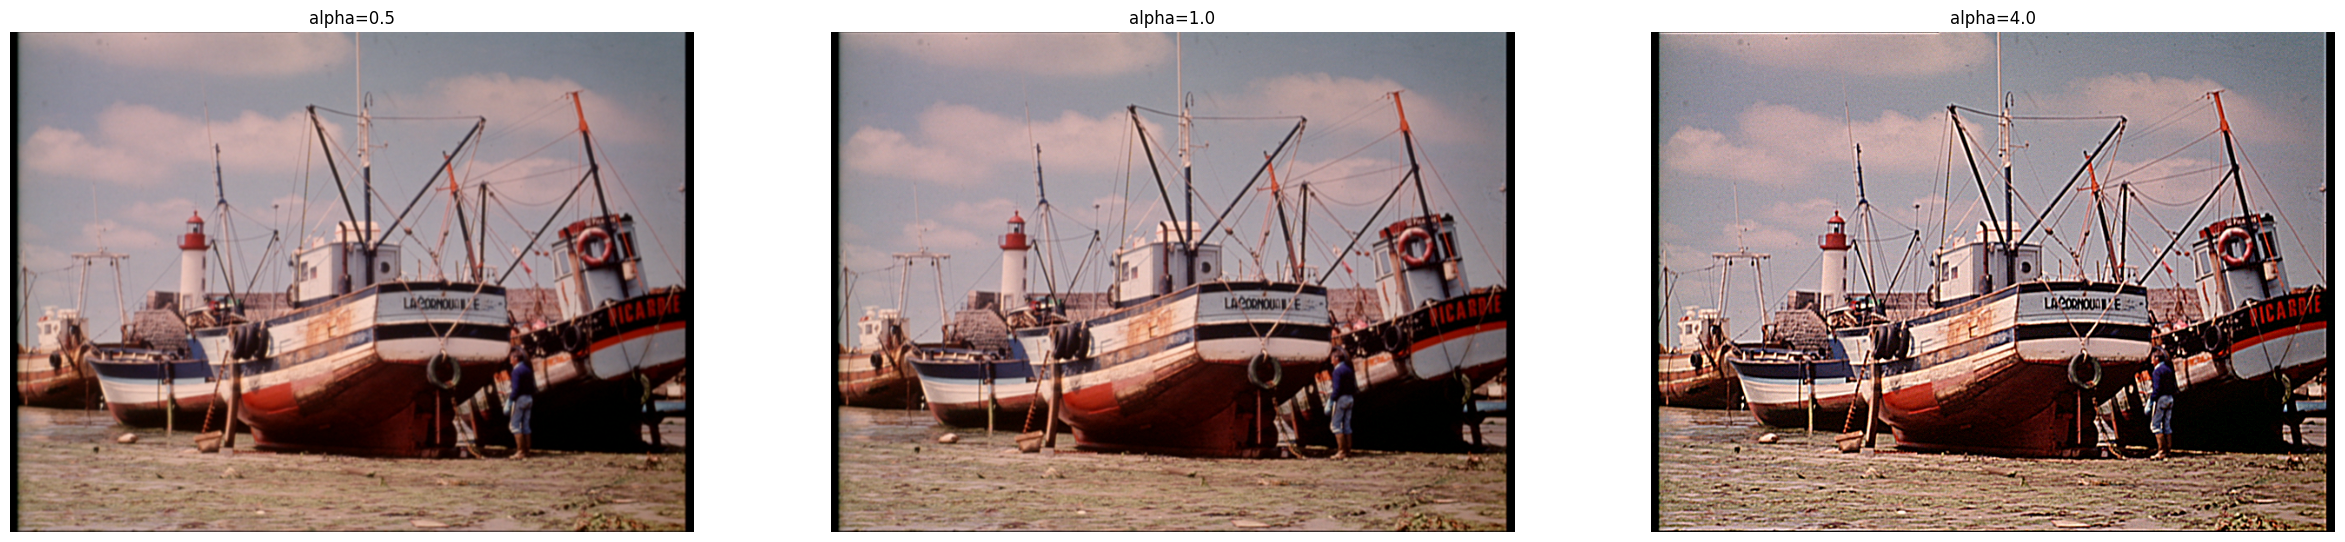

In [11]:



enhanced_images = [apply_filter(smothed_image, kernel) for kernel in laplacian_kernels]

plot_images(enhanced_images, titles=[f'alpha={alpha}' for alpha in variety_alpha])
